<a href="https://colab.research.google.com/github/AnirudhRK18/sppu-practicals-LP-3-/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')



In [18]:
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


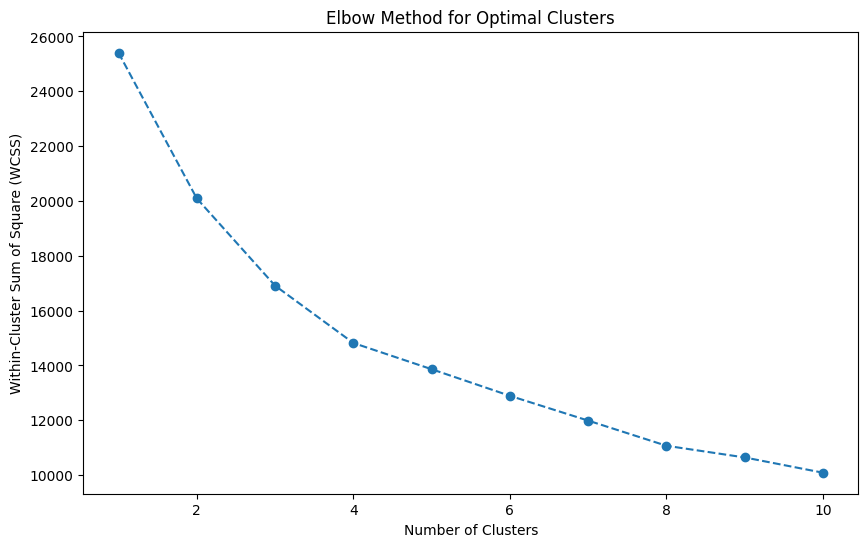

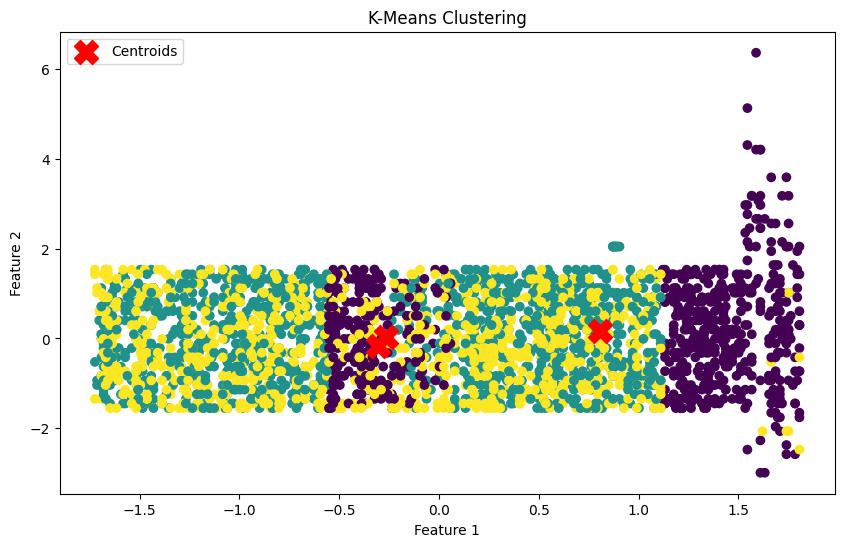

In [19]:
selected_data = data.select_dtypes(include=[np.number])  # Select numerical columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Step 2: Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph to find the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square (WCSS)')
plt.show()

# Step 3: Fit K-Means with the optimal number of clusters
optimal_clusters = 3  # Replace with the elbow-determined cluster count
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Step 4: Visualize the Clusters (for 2D or 3D data)

# Example 1: Plot if you have 2 numerical features
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=data['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [20]:
# Fit K-Means with the optimal number of clusters
optimal_clusters = 3  # Replace with the number from the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the original data for further analysis
data['Cluster'] = kmeans.labels_

# Optional: Display a few rows of the clustered data
print(data.head())



   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... ADDRESSLINE2  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...          NaN   
1    5/7/2003 0:00  Shipped       2         5     2003  ...          NaN   
2    7/1/2003 0:00  Shipped       3         7     2003  ...          NaN   
3   8/25/2003 0:00  Shipped       3         8     2003  ...          NaN   
4  10/10/2003 0:00  Shipped       4        10     2003  ...          NaN   

            CITY STATE POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME  \
0            NYC    NY      10022     U